# ECE3200J
Author: Minjie Mao


In [11]:
from scipy import constants as const
import numpy as np
import math

## Chapter 1 The Crystal Structure of Solids
### Basic Crystal Strutures
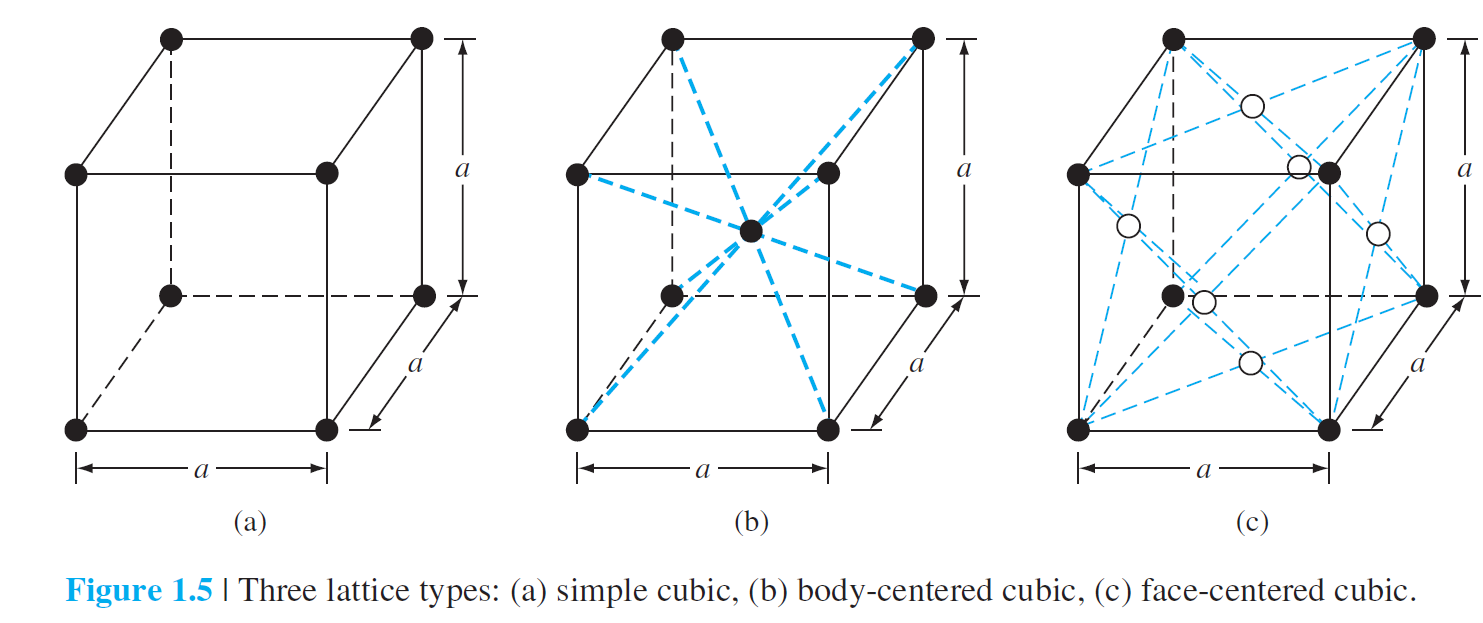

### Miller Indices
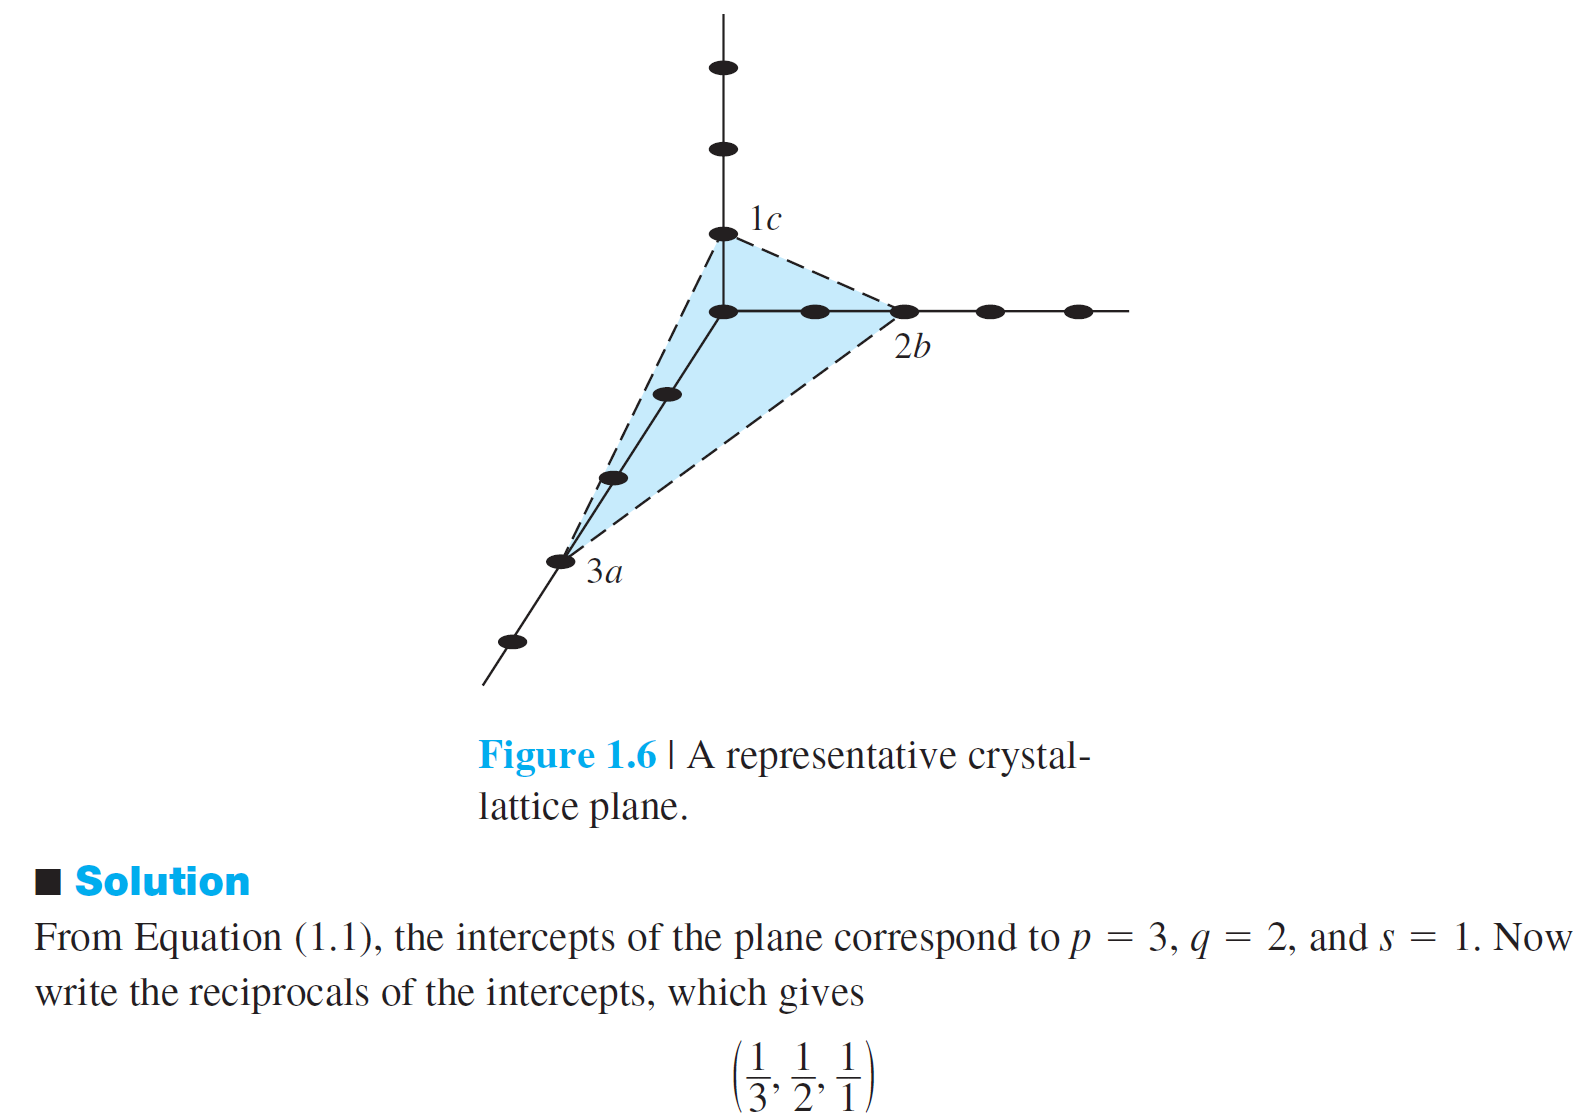

In [12]:
def volume_density(n, side):
    density = n / pow(side, 3)
    print(f"volume density: {density:e}")
    return density

volume_density(1, 1)

volume density: 1.000000e+00


1.0

In [13]:
def surface_density(n, side):
    density = n / pow(side, 2)
    print(f"surface density: {density:e}")
    return density

surface_density(1, 1)

surface density: 1.000000e+00


1.0

### Direction in Crystal
In addition to describing crystal planes in a lattice, we may want to describe a particular
direction in the crystal. The direction can be expressed as a set of three integers
that are the components of a vector in that direction. For example, the body diagonal
in a simple cubic lattice is composed of vector components 1, 1, 1. The body
diagonal is then described as the [111] direction. The brackets are used to designate
direction as distinct from the parentheses used for the crystal planes

## Chapter 2 Introduction to Quantum Mechanics
### Second Order Differential Equations
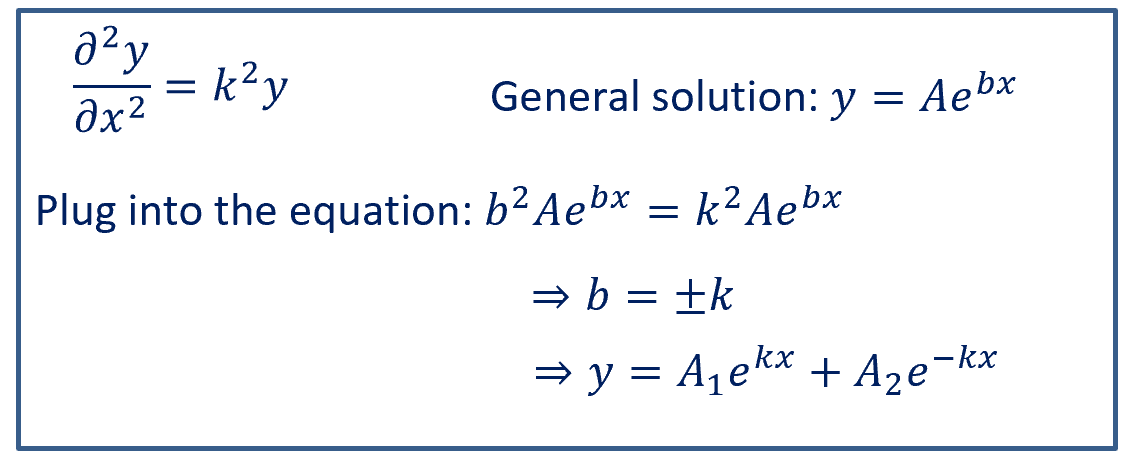
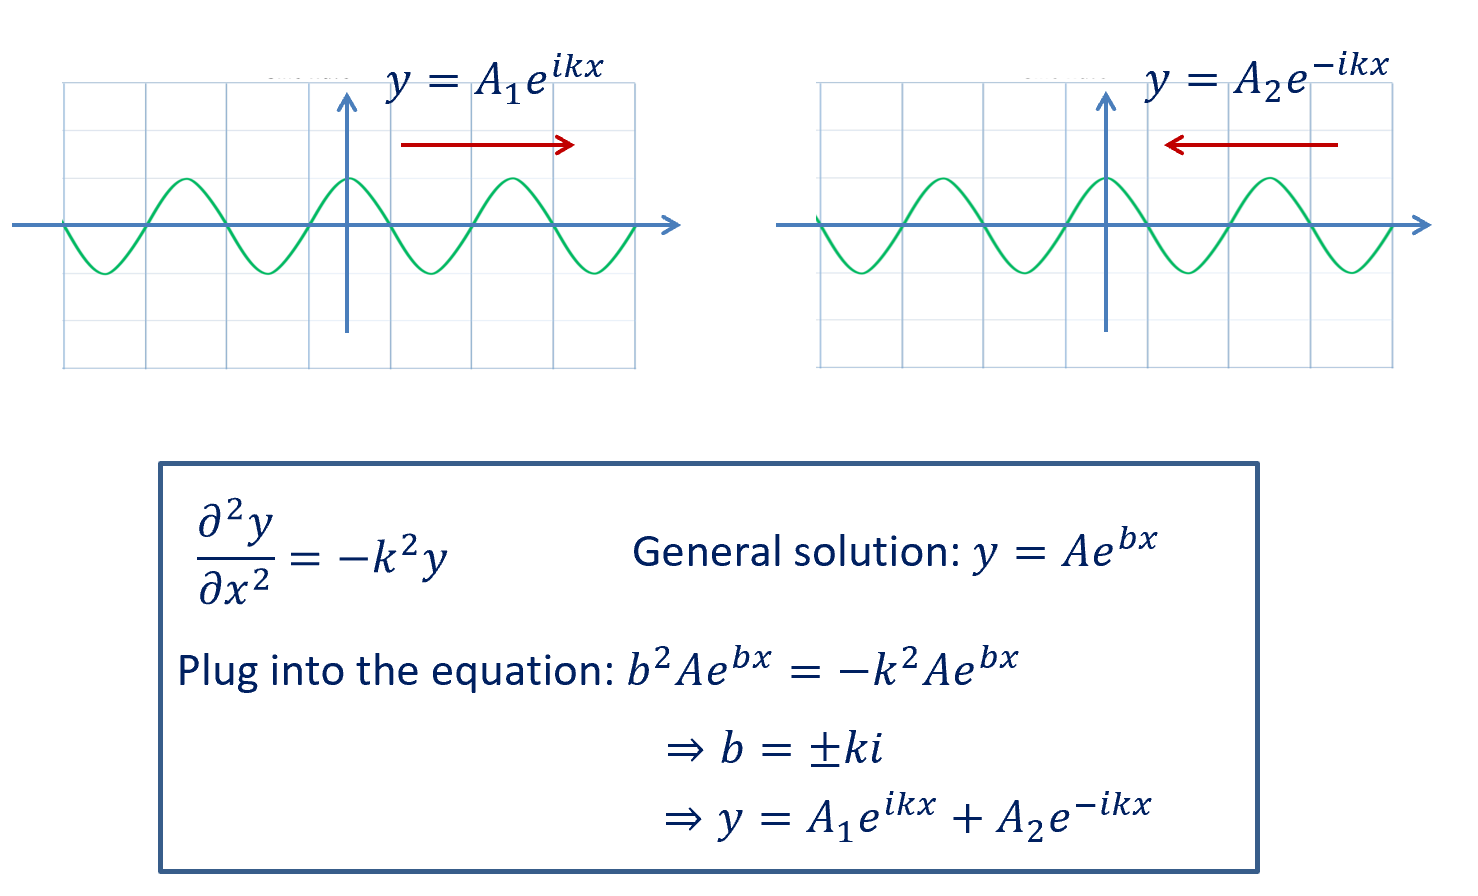
### Principles of Quantum Mechanics
Energy: $$E=h \nu = \hbar \omega$$
Momentum: $$p = mc = \frac{E}{c} = \frac{h \nu}{c} = \frac{h}{\lambda} = \frac{\hbar}{k}$$

In [14]:
def energy(nu):
    E = const.h * nu
    print(f"Energy: {E:e}")
    return E

energy(1)

Energy: 6.626070e-34


6.62607015e-34

In [15]:
def nu_lambda(x):
    result = const.c / x
    print(f"If x is lambda, nu: {result:e}; If x is nu, lambda: {result:e};")
    return result

# nu_lambda(3)

def momentum(lamb):
    p = const.h / lamb
    print(f"Momentum: {p:e}")
    return p

# momentum(1)

### Schrodinger's Wave Equation
$$
-\frac{\hbar^2}{2 m} \frac{\partial^2 \Psi}{\partial x^2}+V(x) \Psi=E \Psi
$$
#### Probability Function
$$
|\Psi(x, t)|^2=\psi(x) \psi^*(x)=|\psi(x)|^2
$$
$$
\int ^\infty_{-\infty} |\psi(x)|^2 = 1
$$